In [2]:
pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=1ac73ebb80cc29e6de4c6a5349970aa44dcff04ed759647b74ecb8296405dba8
  Stored in directory: c:\users\molly\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [41]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
import requests
import json
url = 'https://api.openweathermap.org/data/2.5/weather'
count = 1
response_json=[]
lat =[]
temp =[]
humidity = []
clouds = []
windspeed =[]


for city in cities:   
    try:
        time.sleep(1)
        query_url = url + '?q=' + city + '&appid=' + weather_api_key
        city_response = requests.get(query_url).json()
        response_json.append(city_response)
        lat.append(city_response['coord']['lat'])
        temp.append(city_response['main']['temp'])
        humidity.append(city_response['main']['humidity'])
        clouds.append(city_response['clouds']['all'])
        windspeed.append(city_response['wind']['speed'])
        print('Processing city number ' + str(count) + ' : ' + city)
        
    except:
        print('City number ' + str(count) +" "+ city + 'is not available')
        lat.append('NA')
        temp.append('NA')
        humidity.append('NA')
        clouds.append('NA')
        windspeed.append('NA')
    count = count + 1

City number 1 barentsburgis not available
Processing city number 2 : cape coast
Processing city number 3 : sterlibashevo
Processing city number 4 : raudeberg
Processing city number 5 : port hardy
Processing city number 6 : hilo
Processing city number 7 : castro
Processing city number 8 : mahibadhoo
Processing city number 9 : anchorage
Processing city number 10 : albany
Processing city number 11 : aksu
Processing city number 12 : kholmsk
Processing city number 13 : egvekinot
Processing city number 14 : boyolangu
Processing city number 15 : nikolskoye
City number 16 illoqqortoormiutis not available
Processing city number 17 : maragogi
Processing city number 18 : tiksi
Processing city number 19 : kapaa
Processing city number 20 : avarua
Processing city number 21 : klaeng
Processing city number 22 : sukhodol
Processing city number 23 : griffith
Processing city number 24 : bandarbeyla
Processing city number 25 : ayagoz
Processing city number 26 : dikson
Processing city number 27 : mataura
P

Processing city number 214 : bilma
Processing city number 215 : agadez
City number 216 brahmapuriis not available
Processing city number 217 : kaliyaganj
Processing city number 218 : batemans bay
Processing city number 219 : rio grande
City number 220 azrowis not available
Processing city number 221 : te anau
Processing city number 222 : mafeteng
City number 223 kamenskoyeis not available
Processing city number 224 : beloha
City number 225 sentyabrskiyis not available
Processing city number 226 : nome
Processing city number 227 : mnogovershinnyy
Processing city number 228 : puntarenas
Processing city number 229 : yellowknife
Processing city number 230 : yueyang
Processing city number 231 : papetoai
Processing city number 232 : amuntai
Processing city number 233 : alpena
Processing city number 234 : marshfield
Processing city number 235 : pyay
Processing city number 236 : reporoa
Processing city number 237 : kochevo
Processing city number 238 : price
Processing city number 239 : brae
Pr

Processing city number 427 : toropets
Processing city number 428 : mariinskiy posad
Processing city number 429 : kargil
Processing city number 430 : sorland
Processing city number 431 : kaduna
Processing city number 432 : sampit
Processing city number 433 : ostrovnoy
Processing city number 434 : nemuro
Processing city number 435 : indian head
Processing city number 436 : porto novo
Processing city number 437 : dalvik
Processing city number 438 : shahr-e babak
Processing city number 439 : darab
Processing city number 440 : ladispoli
Processing city number 441 : iralaya
Processing city number 442 : necochea
Processing city number 443 : severo-kurilsk
Processing city number 444 : vanavara
Processing city number 445 : la plaine
Processing city number 446 : lata
Processing city number 447 : kisangani
Processing city number 448 : atlantic city
Processing city number 449 : ixtapa
Processing city number 450 : saint-francois
Processing city number 451 : solvychegodsk
Processing city number 452 

In [50]:
tempF = []
for temperature in temp:
    if temperature != 'NA':
        new_temp = (float(temperature) - 273.15) * 9/5 + 32
    else:
        new_temp = 'NA'
    tempF.append(new_temp)
tempF

['NA',
 80.58200000000002,
 3.3800000000000416,
 24.008000000000003,
 33.38600000000007,
 70.17800000000007,
 61.141999999999996,
 81.23000000000005,
 16.430000000000042,
 19.814000000000032,
 42.49400000000007,
 28.4,
 -25.95999999999998,
 85.35200000000007,
 4.622000000000035,
 'NA',
 77.25200000000008,
 -12.009999999999977,
 70.7,
 84.2,
 87.33200000000002,
 5.7919999999999945,
 19.868000000000087,
 73.88600000000007,
 2.533999999999992,
 -22.647999999999982,
 49.891999999999996,
 78.8,
 'NA',
 68.21600000000001,
 37.4,
 73.99400000000007,
 64.4,
 22.928000000000065,
 64.70600000000003,
 81.53600000000007,
 0.24800000000002598,
 24.908000000000005,
 87.8,
 64.32800000000006,
 57.092,
 74.066,
 78.78200000000001,
 73.00400000000005,
 72.86000000000008,
 -27.399999999999956,
 66.25400000000005,
 24.170000000000062,
 69.60200000000007,
 78.33200000000002,
 17.6,
 56.24600000000005,
 73.20200000000008,
 'NA',
 80.6,
 'NA',
 67.64000000000001,
 'NA',
 78.8,
 44.79800000000002,
 68.0,
 34

In [67]:
#Convert Raw Data to DataFrame

#Display the DataFrame

weather_dict={"City": cities,
             "Latitude": lat,
             "Temperature (F)": tempF,
             "Humidity (%)": humidity,
             "Cloudiness (%)": clouds,
             "Windspeed (mph)": windspeed}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Windspeed (mph)
0,barentsburg,NA,NA,NA,NA,NA
1,cape coast,5.1053,80.582,83,0,3.61
2,sterlibashevo,53.4376,3.38,94,100,3.47
3,raudeberg,61.9875,24.008,61,0,3.55
4,port hardy,50.6996,33.386,59,75,8.75
...,...,...,...,...,...,...
608,casper,42.8666,5.45,72,90,4.63
609,kurchum,48.5722,4.424,86,100,0.64
610,santa rosa,14.3122,84.182,78,40,3.09
611,muroto,33.2833,55.4,38,0,4.63


In [53]:
#Export the city data into a .csv.
weather_data.to_csv('weatherdata.csv', index=False, header = True)

In [72]:
#Clean data
clean_weather = weather_data.loc[(weather_data["Latitude"] != "NA"), :]
clean_weather


100

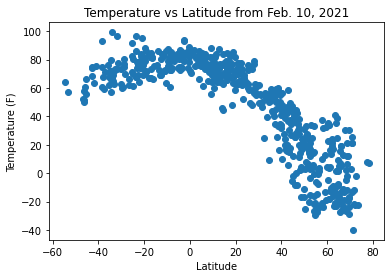

In [76]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot
Latitude = clean_weather['Latitude']
Temp = clean_weather['Temperature (F)']

plt.scatter(Latitude, Temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude from Feb. 10, 2021')

plt.savefig('TempVLat.png')
plt.show()

#This graph shows that the higher temperatures typically came from the Southern Hemisphere where it is currently summer or
#where it is closer to the equater. The coldest temperatures are further from the equater in the Northern Hemisphere where
#it is currently winter.

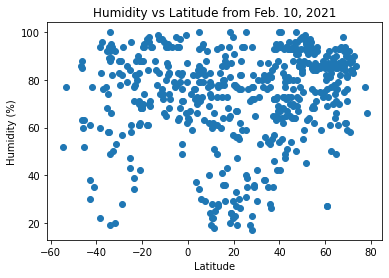

In [77]:
#Latitude vs. Humidity Plot

Humidity = clean_weather['Humidity (%)']

plt.scatter(Latitude, Humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude from Feb. 10, 2021')

plt.savefig('HumidVLat.png')
plt.show()

#This plot does not appear to show a very close correlation between whether latitude might have an impact on humidity. 

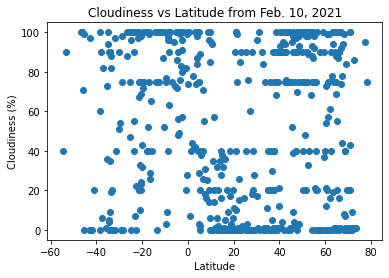

In [79]:
#Latitude vs. Cloudiness Plot
Cloudiness = clean_weather['Cloudiness (%)']

plt.scatter(Latitude, Cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude from Feb. 10, 2021')

plt.savefig('CloudVLat.png')
plt.show()

#This plot does not appear to show a very close correlation between whether latitude might have an impact on cloud coverage. 

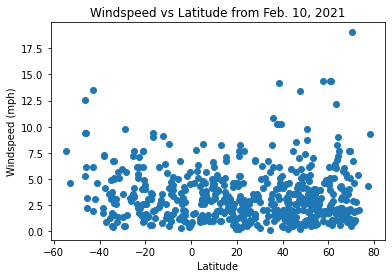

In [80]:
#Latitude vs. Wind Speed Plot
Wind = clean_weather['Windspeed (mph)']

plt.scatter(Latitude, Wind)
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Windspeed vs Latitude from Feb. 10, 2021')

plt.savefig('WindVLat.png')
plt.show()

#This plot does not appear to show a very close correlation between whether latitude might have an impact on windspeed. 

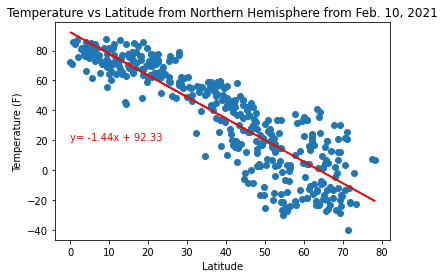

In [102]:
#Linear Regression
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
North_Hemi = clean_weather.loc[(clean_weather['Latitude']>0),:]
North_Hemi

North_lat = North_Hemi['Latitude']
North_temp = North_Hemi['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_temp.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_temp)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(0,20), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthTempVLat.png')
plt.show()

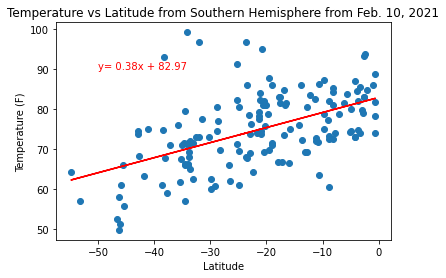

In [104]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
South_Hemi = clean_weather.loc[(clean_weather['Latitude']<0),:]
South_Hemi

South_lat = South_Hemi['Latitude']
South_temp = South_Hemi['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_temp.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_temp)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-50,90), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthTempVLat.png')
plt.show()

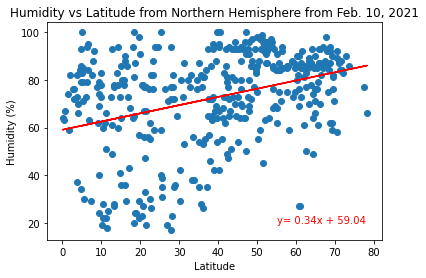

In [109]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
North_humid = North_Hemi['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_humid.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_humid)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(55,20), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthHumidVLat.png')
plt.show()

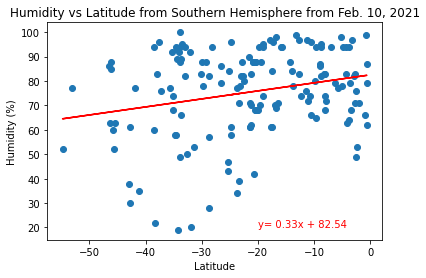

In [111]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
South_humid = South_Hemi['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_humid.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_humid)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-20,20), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthHumidVLat.png')
plt.show()

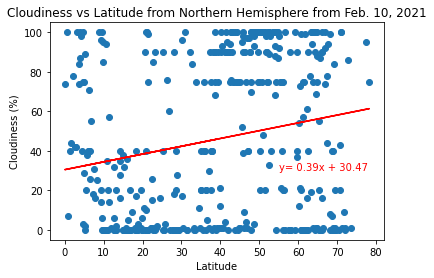

In [114]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
North_cloud = North_Hemi['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_cloud.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_cloud)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(55,30), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthCloudVLat.png')
plt.show()

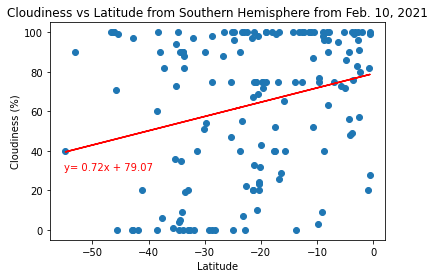

In [117]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
South_cloud = South_Hemi['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_cloud.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_cloud)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-55,30), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthCloudVLat.png')
plt.show()

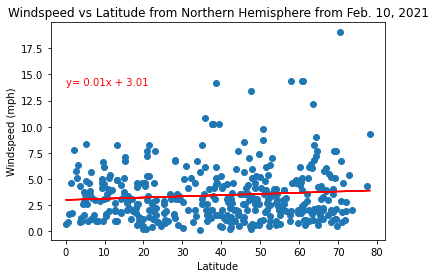

In [119]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
North_wind = North_Hemi['Windspeed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_wind.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_wind)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(0,14), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Windspeed vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthWindVLat.png')
plt.show()

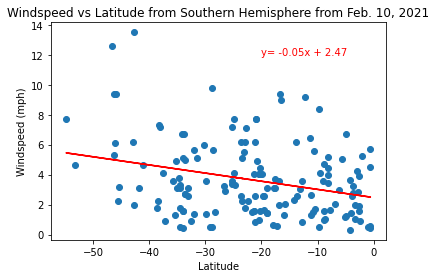

In [121]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
South_wind = South_Hemi['Windspeed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_wind.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_wind)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-20,12), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Windspeed vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthWindVLat.png')
plt.show()